# Especialização em Inteligência Artificial – IFMG
# Trabalho da disciplina de Redes Neurais e Aprendizado Profundo
**Alunos**: 
- Alexandre Fortes Santana  
- Bruno da Cunha Ferreira  
- Thiago Duarte de Souza  
- Cleverson José Murta Galdino  

**Professor**: Agnaldo José da Rocha Reis - UFOP

### 1. O que é inteligência para você?

Para mim, inteligência poderia ser definida pelos tópicos a seguir:
- Inteligência se manifesta em diferentes graus e tipos;
- Inteligência se desenvolve em um indivíduo, a princípio, biológico;
- O indivíduo detentor de inteligência em questão precisa ter a capacidade de memorizar informações em alguma escala;
- O indivíduo detentor de inteligência utiliza as informações a que tem acesso para interpretar o mundo a sua volta e a si mesmo;
- O indivíduo detentor de inteligência é capaz de decisões, agir e criar novos artefatos (imaginários ou físicos).

### 2. Em sua opinião, o que aconteceria se alguém descobrisse como implementar uma IA mais abrangente (e.g., AGI) em um robô?
A descoberta de uma Inteligência Artificial Geral seria um marco histórico para a humanidade. Experimentaríamos um período de frenesi nas redes sociais, nos noticiários e nas rodas de conversa. Muitos dilemas seriam discutidos, abordando temas como mercado de trabalho, impacto social, segurança, regulação, ética e questões militares. Os primeiros robôs focariam em demonstrar o potencial de suas aplicações e em realizar apresentações que alimentassem o frenesi público. Após um período marcado por medo, especulações e empolgação, veríamos as primeiras aplicações práticas direcionadas a problemas reais. Os primeiros robôs comerciais seriam mais simples, devido ao elevado custo de produção, e não necessariamente seriam humanoides. Não, não acredito que as máquinas se revoltariam, levando a um apocalipse.

### 3. Análise de um processo de destilação fracionada de petróleo
A partir da análise de um processo de destilação fracionada de petróleo observou-se que determinado óleo poderia ser classificado em duas classes de pureza {C1 e C2}, mediante a medição de três grandezas {x1, x2 e x3} que representam algumas das propriedades físico-químicas do óleo. Para tanto, pretende-se utilizar um perceptron para executar a classificação automática dessas duas classes. Assim, baseadas nas informações coletadas do processo, formou-se o conjunto de treinamento em anexo (vou te passar a estrutura de dados nas próximas mensagens), tomando por convenção o valor –1 para óleo pertencente à classe C1 e o valor +1 para óleo pertencente à classe C2.

**a. Execute dois treinamentos para a rede perceptron, inicializando-se o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**

In [13]:
import numpy as np
import pandas as pd

data = np.loadtxt('tab_treinamento1.dat')
training_data = data[:, :3]
labels = data[:, 3]

# Bias: Adicionando uma coluna de uns ao conjunto de dados de treinamento
training_data = np.c_[np.ones(training_data.shape[0]), training_data]

epochs = 1000
learning_rate = 0.1

# Inicialização de pesos
def initialize_weights(dim):
    return np.random.rand(dim)

# Treinamento do Perceptron
def train_perceptron(training_data, labels, learning_rate, epochs):
    # Inicialização de pesos
    weights = initialize_weights(training_data.shape[1])
    initial_weights = np.copy(weights)
    no_errors = 0
    final_epoch = 0
    
    for epoch in range(epochs):
        for i in range(len(training_data)):
            x = training_data[i]
            y = labels[i]
            
            # Cálculo do output e função de ativação
            output = np.dot(weights, x)
            prediction = 1 if output > 0 else -1

            # Atualização de pesos
            if prediction != y:
                weights += learning_rate * (y - prediction) * x
                no_errors += 1

        if no_errors == 0:
            final_epoch = epoch+1
            print(f"Convergiu na época {final_epoch}")
            break
        no_errors = 0 # reseta contador de erros
                
    return initial_weights, weights, final_epoch

# DataFrame para armazenar os resultados
results_df = pd.DataFrame(columns=["Treinamento", "Vetor de Pesos Inicial", "Vetor de Pesos Final", "Número de Épocas"])

# Executando Dois Treinamentos
for i in range(2):
    initial_weights, final_weights, final_epoch = train_perceptron(training_data, labels, learning_rate, epochs)  
    
    print(initial_weights)
    print(final_weights)
    print(final_epoch)

    new_row_df = pd.DataFrame({
        "Treinamento": f"T{i+1}",
        "Vetor de Pesos Inicial": initial_weights,
        "Vetor de Pesos Final": final_weights,
        "Número de Épocas": final_epoch
    })
    results_df = pd.concat([results_df, new_row_df], ignore_index=True)

results_df

Convergiu na época 410
[0.52722288 0.49369926 0.19142561 0.03145206]
[30.92722288 15.64027926 24.84662561 -7.37272794]
410
Convergiu na época 432
[0.13379696 0.11727471 0.46864307 0.59758338]
[31.53379696 15.86509471 25.27912307 -7.48259662]
432


,Treinamento,Vetor de Pesos Inicial,Vetor de Pesos Final,Número de Épocas
0,T1,0.527223,30.927223,410
1,T1,0.493699,15.640279,410
2,T1,0.191426,24.846626,410
3,T1,0.031452,-7.372728,410
4,T2,0.133797,31.533797,432
5,T2,0.117275,15.865095,432
6,T2,0.468643,25.279123,432
7,T2,0.597583,-7.482597,432


In [14]:
grouped = results_df.groupby("Treinamento")["Vetor de Pesos Final"].apply(list).reset_index()

weights_T1 = np.array(grouped[grouped["Treinamento"] == "T1"]["Vetor de Pesos Final"].iloc[0])
weights_T2 = np.array(grouped[grouped["Treinamento"] == "T2"]["Vetor de Pesos Final"].iloc[0])

**c. Após o treinamento do perceptron, aplique-o na classificação automática de novas amostras de óleo (ver arquivo tab_teste1.dat), indicando-se na tabela seguinte os resultados das saídas (Classes) referentes aos dois processos de treinamento realizados no item a.**

Para classificar novas amostras usando os pesos finais obtidos após o treinamento vamos criar uma função chamada classify_samples que receberá as novas amostras e os pesos finais.

In [15]:
new_samples = np.loadtxt('tab_teste1.dat')
trained_weights = [weights_T1, weights_T2]

results_df = pd.DataFrame(columns=["Amostra", "x1", "x2", "x3", "y (T1)", "y (T2)"])

# Função para classificar novas amostras
def classify_samples(samples, weights):
    predictions = np.sign(np.dot(samples, weights[1:]) + weights[0])  # Operação vetorizada
    return predictions

# Classificar novas amostras para cada treinamento e armazenar no DataFrame
all_predictions = []

# Classificar novas amostras para cada treinamento
for i, weights in enumerate(trained_weights):
    predictions = classify_samples(new_samples, weights)
    all_predictions.append(predictions)
    print(f"Classificações usando o treinamento T{i+1}: {predictions}")

# Preenchendo o DataFrame
for i, sample in enumerate(new_samples):
    new_row = {
        "Amostra": f"A{i+1}",
        "x1": sample[0],
        "x2": sample[1],
        "x3": sample[2],
        "y (T1)": all_predictions[0][i],
        "y (T2)": all_predictions[1][i],
    }
    results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

# Exibir DataFrame de resultados da classificação
print(results_df)

Classificações usando o treinamento T1: [-1.  1.  1.  1.  1.  1. -1.  1. -1. -1.]
Classificações usando o treinamento T2: [-1.  1.  1.  1.  1.  1. -1.  1. -1. -1.]
  Amostra      x1      x2      x3  y (T1)  y (T2)
0      A1 -0.3565  0.0620  5.9891    -1.0    -1.0
1      A2 -0.7842  1.1267  5.5912     1.0     1.0
2      A3  0.3012  0.5611  5.8234     1.0     1.0
3      A4  0.7757  1.0648  8.0677     1.0     1.0
4      A5  0.1570  0.8028  6.3040     1.0     1.0
5      A6 -0.7014  1.0316  3.6005     1.0     1.0
6      A7  0.3748  0.1536  6.1537    -1.0    -1.0
7      A8 -0.6920  0.9404  4.4058     1.0     1.0
8      A9 -1.3970  0.7141  4.9263    -1.0    -1.0
9     A10 -1.8842 -0.2805  1.2548    -1.0    -1.0


**d. Explique por que o número de épocas de treinamento varia a cada vez que se executa o treinamento do perceptron.**  

Fatores como inicialização de pesos, ordem dos dados, taxa de aprendizado e critérios de convergência contribuem para a variação no número de épocas necessárias para treinar o modelo. No caso específico deste algorítmo, é devido à aleatoriedade dos pesos iniciais.

**e. Qual é a principal limitação do perceptron quando aplicado em problemas de classificação de padrões?**  

A maior limitação do Perceptron é sua incapacidade de resolver problemas que não são linearmente separáveis. Isso significa que se os dados não podem ser separados por uma única linha reta (em 2D), um plano (em 3D), ou um hiperplano (em mais de três dimensões), o Perceptron não será capaz de encontrar um conjunto de pesos que atinja zero erros no conjunto de treinamento.

Esta limitação foi uma das principais razões para o declínio inicial do interesse em redes neurais nos anos 60, especialmente após a publicação do livro "Perceptrons" por Marvin Minsky e Seymour Papert, que provou matematicamente essa limitação para o Perceptron de camada única.

Para solucionar problemas que não são linearmente separáveis, são necessárias estratégias mais complexas, como a inclusão de camadas ocultas para formar uma rede neural multicamadas (Multilayer Perceptron, MLP) e a aplicação de algoritmos de otimização mais sofisticados, como o backpropagation.

Além da limitação de só poder resolver problemas linearmente separáveis, o perceptron também tem outras limitações, como:

- Pode ser lento para treinar, especialmente para conjuntos de dados grandes;
- Pode ser instável, dependendo da inicialização dos pesos;
- Pode ser suscetível a overfitting.

**4. Um sistema de gerenciamento automático de controle de duas válvulas, situado a 500 metros de um processo industrial, envia um sinal codificado constituído de quatro grandezas {x1, x2, x3 e x4} que são necessárias para o ajuste de cada uma das válvulas. Conforme mostra a figura abaixo, a mesma via de comunicação é utilizada para acionamento de ambas as válvulas, sendo que o comutador localizado próximo das válvulas deve decidir se o sinal é para a válvula A ou B. Porém, durante a transmissão, os sinais sofrem interferências que alteram o conteúdo das informações transmitidas. Para resolver este problema, treinar-se-á uma rede ADALINE para classificar os sinais ruidosos, que informará ao sistema comutador se os dados devem ser encaminhados para o comando de ajuste da válvula A ou B.**

**Assim, baseado nas medições dos sinais já com ruídos, formou-se o conjunto de treinamento no arquivo `tab_treinamento2.dat`, tomando por convenção o valor –1 para os sinais que devem ser encaminhados para o ajuste da válvula A e o valor +1 se os mesmos devem ser enviados para a válvula B.**

![Alt text](image.png)

Daí, pede-se:

**a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**  
**b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:**  
**c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).**  

Acurácia do modelo ada1: 94.12%
Acurácia do modelo ada2: 91.18%


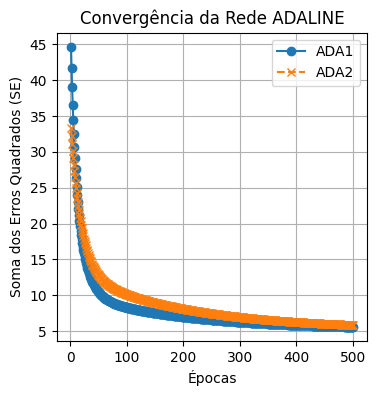

Resultados dos pesos treinamento:
  Treinamento  Número de Épocas  Inicial_w0  Inicial_w1  Inicial_w2   
0        ADA1               500    0.682450    0.714602    0.887183  \
1        ADA2               500    0.389884    0.338751    0.266017   

   Inicial_w3  Inicial_w4      Final_w0  Final_w1  Final_w2  Final_w3   
0    0.428608    0.076276  2.102006e-08  0.529943  1.301589 -0.165739  \
1    0.814673    0.118989  1.200879e-08  0.503726  1.196799 -0.168158   

   Final_w4  
0 -1.625040  
1 -1.523236  
[[ 0.9209311   0.10565261 -0.86389912  0.6099808 ]
 [ 0.0188575   0.61740665 -0.02256117  0.93543358]
 [ 0.15711767 -1.08484267 -0.21284432 -1.44103024]
 [-1.4705047  -0.05808208 -1.80672141  0.31709142]
 [-0.73311714 -0.59563449 -0.13141131 -0.43011482]
 [-0.09445664 -0.79507294 -0.84589383 -1.11340254]
 [-0.32996402  1.08436465  0.40015386  0.54757264]
 [ 1.3023093  -0.70570264 -1.62707776 -0.54387528]
 [ 0.84292193  0.40436676  1.60159755  0.52697131]
 [-0.05872886  0.57933741  1.13

,x1,x2,x3,x4,Predição ADA1,Predição ADA2
0,0.920931,0.105653,-0.863899,0.609981,A,A
1,0.018858,0.617407,-0.022561,0.935434,A,A
2,0.157118,-1.084843,-0.212844,-1.441030,B,B
3,-1.470505,-0.058082,-1.806721,0.317091,A,A
4,-0.733117,-0.595634,-0.131411,-0.430115,A,A
5,-0.094457,-0.795073,-0.845894,-1.113403,B,B
6,-0.329964,1.084365,0.400154,0.547573,B,B
7,1.302309,-0.705703,-1.627078,-0.543875,B,B
8,0.842922,0.404367,1.601598,0.526971,A,A
9,-0.058729,0.579337,1.136325,0.743436,A,A


In [16]:
# **a. Execute 2 treinamentos para a rede ADALINE inicializando o vetor de pesos em cada treinamento com valores aleatórios entre zero e um de tal forma que os elementos do vetor de pesos iniciais não sejam os mesmos.**  
import numpy as np
import pandas as pd

data_sistema = np.loadtxt('tab_treinamento2.dat')
df = pd.DataFrame(data_sistema)

# Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# Valores abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR são considerados outliers.
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

# Identificando os limites para outliers na coluna 3
lower_bound_col3 = Q1[3] - 1.5 * IQR[3]
upper_bound_col3 = Q3[3] + 1.5 * IQR[3]

# Mantendo apenas as linhas onde os valores na coluna 3 não são outliers
df = df[(df.iloc[:, 3] >= lower_bound_col3) & (df.iloc[:, 3] <= upper_bound_col3)]

X = df.iloc[:, 0:4].values  # Entradas
y = df.iloc[:, 4].values  # Saídas

# Padronização dos dados
# Normalização das características de entrada usando o método Z-score
mean = X.mean(axis=0)
std = X.std(axis=0)
X_std = (X - mean) / std
# Modelo ADALINE
class AdalineGD:
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y, reinitialize_weights=True):
        if reinitialize_weights:
            self.w_ = np.random.rand(1 + X.shape[1])
            self.initial_weights_ = np.copy(self.w_)
        
        self.cost_ = []
        self.previous_cost_ = float('inf')  # inicializar com um valor infinito
        
        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Se o custo começar a aumentar, interromper o treinamento
            if cost > self.previous_cost_:
                print(f"Treinamento interrompido na época {i + 1} devido ao aumento do erro.")
                break

            self.previous_cost_ = cost

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)


# Treinamento
###############
eta = 0.001
epochs = 500

# Primeiro treinamento
ada1 = AdalineGD(eta, epochs)
ada1.train(X_std, y)

# Segundo treinamento
ada2 = AdalineGD(eta, epochs)
ada2.train(X_std, y)

## Acurácia
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Para modelo ada1
predictions_ada1 = ada1.predict(X_std)
accuracy_ada1 = accuracy(y, predictions_ada1)

# Para modelo ada2
predictions_ada2 = ada2.predict(X_std)
accuracy_ada2 = accuracy(y, predictions_ada2)

print(f"Acurácia do modelo ada1: {accuracy_ada1 * 100:.2f}%")
print(f"Acurácia do modelo ada2: {accuracy_ada2 * 100:.2f}%")

# Convergência (Através do Custo)
# A convergência do modelo pode ser visualizada examinando a diminuição do custo durante cada época. Se o modelo estiver aprendendo corretamente, o custo deve diminuir à medida que as épocas avançam.
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))

# Plotando o custo para ada1
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o', label='ADA1')

# Plotando o custo para ada2
plt.plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='x', label='ADA2', linestyle='--')

plt.xlabel('Épocas')
plt.ylabel('Soma dos Erros Quadrados (SE)')
plt.legend()
plt.title('Convergência da Rede ADALINE')
plt.grid(True)
plt.show()

#**b. Registre os resultados dos 2 treinamentos acima na tabela abaixo:**

# Dados para o primeiro treinamento (ada1)
initial_weights_ada1 = ada1.initial_weights_
final_weights_ada1 = ada1.w_
epochs_ada1 = len(ada1.cost_)

# Dados para o segundo treinamento (ada2)
initial_weights_ada2 = ada2.initial_weights_
final_weights_ada2 = ada2.w_
epochs_ada2 = len(ada2.cost_)

# Inserir os dados no DataFrame
results_df = pd.DataFrame({
    "Treinamento": ["ADA1", "ADA2"],
    "Vetor de Pesos Inicial": [initial_weights_ada1, initial_weights_ada2],
    "Vetor de Pesos Final": [final_weights_ada1, final_weights_ada2],
    "Número de Épocas": [epochs_ada1, epochs_ada2]
})

# Separa o vetor inicial em colunas distintas
weights_initial_df = results_df['Vetor de Pesos Inicial'].apply(pd.Series)
weights_initial_df = weights_initial_df.rename(columns=lambda x: f'Inicial_w{x}')

# Separa o vetor final em colunas distintas
weights_final_df = results_df['Vetor de Pesos Final'].apply(pd.Series)
weights_final_df = weights_final_df.rename(columns=lambda x: f'Final_w{x}')

# Concatena com o dataframe original
results_df = pd.concat([results_df.drop(columns=['Vetor de Pesos Inicial', 'Vetor de Pesos Final']), weights_initial_df, weights_final_df], axis=1)

print("Resultados dos pesos treinamento:")
print(results_df)

# **c. Para os treinamentos realizados, aplique então a rede ADALINE para classificar e informar ao comutador se os sinais seguintes devem ser encaminhados para a válvula A ou B (ver tab_teste2.dat).**

data_teste = np.loadtxt('tab_teste2.dat')
X_test = data_teste[:, 0:4]  # sinais de entrada
# Padronização dos dados
# Normalização das características de entrada usando o método Z-score
mean_test = X_test.mean(axis=0)
std_test = X_test.std(axis=0)
X_std_test = (X_test - mean_test) / std_test

print(X_std_test)

predictions_ada1 = ada1.predict(X_std_test)
#print(f"Modelo 1 {predictions_ada1}")
predictions_ada2 = ada2.predict(X_std_test)
#print(f"Modelo 2 {predictions_ada2}")

results_test_df = pd.DataFrame(X_std_test, columns=["x1", "x2", "x3", "x4"])
results_test_df["Predição ADA1"] = predictions_ada1
results_test_df["Predição ADA2"] = predictions_ada2

# Convertendo os valores para 'A' e 'B' para melhor visualização
results_test_df["Predição ADA1"] = results_test_df["Predição ADA1"].apply(lambda x: 'A' if x == -1 else 'B')
results_test_df["Predição ADA2"] = results_test_df["Predição ADA2"].apply(lambda x: 'A' if x == -1 else 'B')

results_test_df

**5. Um(a) estudante da disciplina de Redes Neurais e Aprendizado Profundo ficou empolgado(a) com o trabalho do Fisher sobre as flores Íris e resolveu propor uma versão automatizada para ele. Essa nova versão deveria ter dois módulos principais: um módulo de visão computacional e um módulo do tipo classificador neural. Caso você(s) fosse(m) esse(a) estudante, como você(s) desenvolveria(m) esse sistema? Descreva-o em detalhes. Use ilustração(ões) para valorizar o seu pré-projeto. Lembre-se que são três tipos de Íris (Virginica, Versicolor e Setosa) e que 4 parâmetros foram medidos pelo Fisher para cada uma das flores (comprimento e largura da Pétala, Comprimento e largura da Sépala).**

O projeto pode ser encontrado no link: (https://docs.google.com/document/d/1oAT9ueBM05FFpA8k3NKCb3u1_8dOVWDOJTld1i-VdRs/edit?usp=sharing)

**6. Considere a base de dados encontrada em Irisdat.xlsx. Daí, pede-se:**  
**a) Treinar um PMC que classifique observações de flores íris em 3 espécies (Setosa, Versicolor e Virginica) usando como entradas as características SEPALLENGTH (SL), SEPALWIDTH (SW), PETALLENGTH (PL) e PETALWIDTH (PW).**  
**b) Estime SL a partir de SW, PL, PW.**

In [86]:
import pandas as pd

# Carregando os dados
data = pd.read_excel("Irisdat.xlsx")
# Selecionando apenas as colunas desejadas
selected_columns = ['SL', 'SW', 'PL', 'PW', 'TYPE']
filtered_df = data[selected_columns].dropna()
filtered_df = pd.DataFrame(data, columns=['SL', 'SW', 'PL', 'PW', 'TYPE'])
for col in ['SL', 'SW', 'PL', 'PW']:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

filtered_df = filtered_df.dropna()
filtered_df.head()

,SL,SW,PL,PW,TYPE
0,5.0,3.3,1.4,0.2,SETOSA
1,6.4,2.8,5.6,2.2,VIRGINIC
2,6.5,2.8,4.6,1.5,VERSICOL
3,6.7,3.1,5.6,2.4,VIRGINIC
4,6.3,2.8,5.1,1.5,VIRGINIC


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow as tf
# Preparando os dados
X = filtered_df[['SL', 'SW', 'PL', 'PW']].values
y = filtered_df['TYPE'].values.reshape(-1, 1)

# Codificando a saída
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Construindo o PMC
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
12/12 [==============================] - 1s 14ms/step - loss: 1.1771 - accuracy: 0.4522 - val_loss: 1.1821 - val_accuracy: 0.4828
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 1.1159 - accuracy: 0.5304 - val_loss: 1.1190 - val_accuracy: 0.4828
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.5217 - val_loss: 1.0606 - val_accuracy: 0.4828
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 1.0140 - accuracy: 0.5217 - val_loss: 1.0037 - val_accuracy: 0.3793
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9676 - accuracy: 0.4957 - val_loss: 0.9535 - val_accuracy: 0.3793
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.9245 - accuracy: 0.4957 - val_loss: 0.9110 - val_accuracy: 0.4483
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.8882 - accuracy: 0.4783 - val_loss: 0.8664 - val_accuracy: 0.4828
Epoch 8/50
12/12 [=

**b) Estime SL a partir de SW, PL, PW**

In [90]:
# Preparando os dados de regressão
X_reg = filtered_df[['SW', 'PL', 'PW']].values
y_reg = filtered_df['SL'].values.reshape(-1, 1)

# Dividindo os dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Normalizando os dados de regressão
scaler_reg = StandardScaler().fit(X_train_reg)
X_train_reg = scaler_reg.transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

# Construindo o modelo de regressão
reg_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,)),  # Temos 3 entradas agora: SW, PL, PW
    tf.keras.layers.Dense(1)  # A saída é um valor único, SL
])

# Compilando o modelo de regressão
reg_model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo de regressão
reg_model.fit(X_train_reg, y_train_reg, epochs=50, batch_size=10, validation_data=(X_test_reg, y_test_reg))

Epoch 1/50
12/12 [==============================] - 0s 9ms/step - loss: 33.3526 - val_loss: 34.0184
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 32.1132 - val_loss: 32.8017
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 30.8941 - val_loss: 31.6276
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 29.7168 - val_loss: 30.4575
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 28.5809 - val_loss: 29.2934
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 27.4418 - val_loss: 28.1845
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 26.3441 - val_loss: 27.0903
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 25.2547 - val_loss: 26.0054
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 24.2053 - val_loss: 24.9311
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 23.1618 - val_loss: 23.8716

**7. Considere a base de dados encontrada em engines.xlsx, em que ‘Fuel rate’ e ‘Speed’ são variáveis de entrada e ‘Torque’ e ‘Nitrous Oxide Emissions (NOE)’ são as variáveis de saída, respectivamente. Desenvolva três regressores. Um deles deve estimar conjuntamente o ‘Torque’ e o NOE. Já os outros dois devem estimar essas saídas separadamente (i.e. um estimará o Torque e o outro o NOE). Compare o desempenho das duas estratégias apontando qual delas apresenta uma maior capacidade de generalização.**

In [12]:
#Regressor para estimar conjuntamente o `Torque` e o `NOE``
#Regressor para estimar apenas o `Torque`
#Regressor para estimar apenas o `NOE`
#Comparação

import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Carregando e transpondo os dados
data_engine = pd.read_excel("engines-tratado.xlsx")

# Preparação dos dados
X = data_engine[['fuel_rate', 'speed']]
y = data_engine[['torque', 'noe']]

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler_X = StandardScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = StandardScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

# Construindo o regressor conjunto
model_conjunto = Sequential([
    Dense(32, activation='relu', input_dim=2),
    Dense(32, activation='relu'),
    Dense(2, activation='linear')  # Duas saídas: torque e noe
])
model_conjunto.compile(optimizer=Adam(), loss='mean_squared_error')

# Treinamento do regressor conjunto
model_conjunto.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Avaliação do regressor conjunto
loss_conjunto = model_conjunto.evaluate(X_test, y_test, verbose=1)

# Construindo e treinando regressores individuais
outputs = ['torque', 'noe']
losses = {}
for output in outputs:
    model = Sequential([
        Dense(32, activation='relu', input_dim=2),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    y_train_single = y_train[:, outputs.index(output)]
    y_test_single = y_test[:, outputs.index(output)]
    model.fit(X_train, y_train_single, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    losses[output] = model.evaluate(X_test, y_test_single, verbose=1)

# Comparando o desempenho
print(f"Loss do regressor conjunto: {loss_conjunto}")
for output, loss in losses.items():
    print(f"Loss do regressor {output}: {loss}")

8/8 [==============================] - 0s 1ms/step - loss: 0.0152
Loss do regressor conjunto: 0.006613506469875574
Loss do regressor torque: 0.001184589695185423
Loss do regressor noe: 0.015219268389046192


1. **Loss do regressor conjunto: 0.006613506469875574** 
   
   Este valor refere-se à perda de um modelo que tenta prever ambas as saídas ("Torque" e "NOE") simultaneamente. O valor é relativamente baixo, mas para avaliar se é realmente bom, é preciso comparar com uma baseline ou benchmark adequado.

2. **Loss do regressor torque: 0.001184589695185423** 
   
   Este valor é significativamente menor do que o regressor conjunto, indicando que este modelo específico que prevê somente o "Torque" é mais preciso (ou tem menos erro) do que o regressor conjunto, pelo menos no que diz respeito à variável "Torque".

3. **Loss do regressor noe: 0.015219268389046192** 
   
   Este valor é o mais alto entre os três. Indica que o modelo que prevê somente "NOE" tem o maior erro entre os modelos apresentados. É quase 2,3 vezes maior do que o erro do regressor conjunto e muito maior do que o erro do regressor de torque.

Em resumo:

- O modelo para "Torque" parece ser o mais preciso.
- O modelo para "NOE" parece ser o menos preciso.
- O modelo conjunto, que tenta prever ambas as saídas simultaneamente, fica entre os dois em termos de precisão.

**8. Valendo-se da base de dados reais referente ao Volume de Vendas de Passagens (VVP) de uma companhia aérea norte-americana que se encontra no arquivo vvp.xlsx, pede-se:**  

**1) Desenvolver um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá 4 realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente);** 

In [2]:
!pip install darts

                                              0.0/784.8 kB ? eta -:--:--
     -----                                  112.6/784.8 kB 3.2 MB/s eta 0:00:01
     -----------------------------          614.4/784.8 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 784.8/784.8 kB 7.0 MB/s eta 0:00:00
                                              0.0/778.9 kB ? eta -:--:--
     ------------------------------------  778.2/778.9 kB 24.0 MB/s eta 0:00:01
     ------------------------------------- 778.9/778.9 kB 16.4 MB/s eta 0:00:00
                                              0.0/566.2 kB ? eta -:--:--
     ------------------------------------- 566.2/566.2 kB 37.1 MB/s eta 0:00:00
                                              0.0/153.4 kB ? eta -:--:--
     ---------------------------------------- 153.4/153.4 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/4


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


O valor do MSE para a predição recursiva sem decomposição é de: 4509.179604567584


<Axes: xlabel='time'>

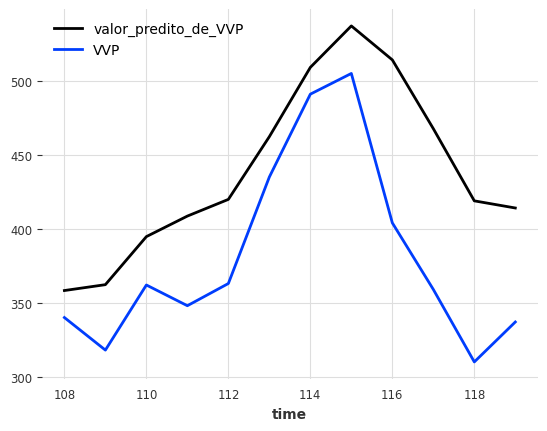

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from darts import TimeSeries
from darts.models import RegressionModel

df = pd.read_excel('vvp.xlsx')

# Transpondo os dados da planilha, renomeando as colunas das variáveis de interesse, tratando tipo das colunas
df = (
    df[:1]
    .drop(columns=['Unnamed: 0','Unnamed: 1','Meses'],axis=1)
    .T
    .reset_index()
    .rename(columns={'index':'Meses', 0: 'VVP'})
    .astype({'VVP':np.float64})
    .assign(Meses = pd.date_range(start='1/1/1949', periods= 120, freq='M'))
    )

# Formatando as datas com apenas mês ano
df['Meses'] = df.Meses.dt.to_period('M')

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_series(df.VVP)

# Set aside the last 12 months as a validation series
train, val = series[:-12], series[-12:]
model = RegressionModel(
    model = MLPRegressor(random_state=1, max_iter=500),
    lags = [-1, -12]
)

model.fit(series = train)

pred = model.predict(n = 12, series = train)

mse = mean_squared_error(pred.values(), val.values())

print(f'O valor do MSE para a predição recursiva sem decomposição é de: {mse}')

pred.plot(label= 'valor_predito_de_VVP')
val.plot(label= 'VVP')

**2) De posse da base de dados, remova a tendência linear presente na base de dados original. Desse modo, você conhecerá a série destendenciada e a tendência linear. Para a primeira série, desenvolva um previsor neural que receba como entradas os VVPs registrados nos instantes k-1 e k-12 (i.e. VVP(k-1) e VVP(k-12)) e que disponibilize na saída o VVP no instante corrente k (i.e. VVP(k)). O previsor deverá realizar previsões recursivas de 1 a 12 passos à frente (i.e., de um a doze meses à frente). Para a segunda (i.e., a tendência linear), preveja linearmente os próximos dozes pontos. Em seguida, some ponto a ponto as duas previsões e compare o desempenho dessa abordagem com a anterior apontando qual delas apresenta uma maior capacidade de generalização.**

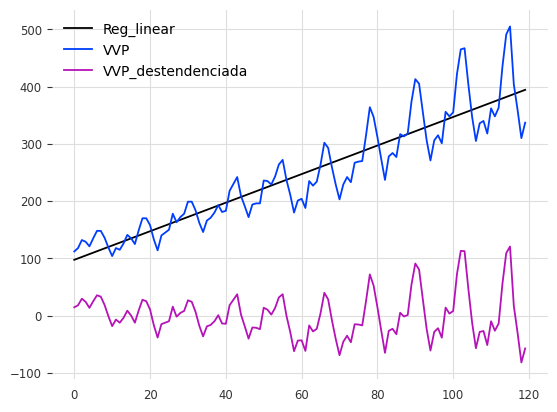

In [4]:
X = [i for i in range(0, len(df.VVP))]
X = np.reshape(X, (len(X), 1))
y = df.VVP
reg = LinearRegression()
reg.fit(X,y)
trend = reg.predict(X)

plt.plot(trend, label = 'Reg_linear')
plt.plot(y, label = 'VVP')

df['VVP_destendenciada'] = df.VVP - trend
plt.plot(df.VVP_destendenciada, label= 'VVP_destendenciada')

plt.legend()

O valor do MSE para a predição recursiva decomposta é de: 798.6752069547023


c:\Users\alexa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: xlabel='time'>

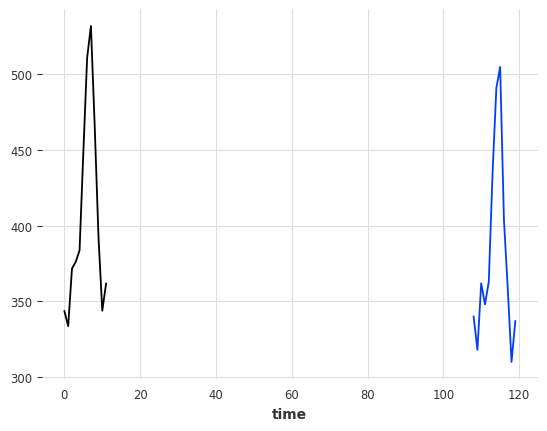

In [5]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_series(df.VVP_destendenciada)

# Set aside the last 12 months as a validation series
train = series[:-12]
val = df.VVP [-12:]

model = RegressionModel(
    model = MLPRegressor(random_state=1, max_iter=500),
    lags = [-1, -12]
)

model.fit(series = train)

pred = model.predict(n = 12, series = train)

pred_plus_trend = np.array([i[0] for i in pred.values()]) + trend[-12:]

mse = mean_squared_error(pred_plus_trend, val)

print(f'O valor do MSE para a predição recursiva decomposta é de: {mse}')

plt.plot(pred_plus_trend)
val.plot(label= 'VVP')

**9. Procure na literatura 2 artigos que tratem do tema Sensores Inferenciais (ou Soft Sensors) para uma dada grandeza de seu interesse (e.g. temperatura, pressão, vazão, nível etc.) e que tenham sido publicados nos últimos 5 anos. Explique de forma sucinta o que foi desenvolvido pelos autores, referenciando-os. Sugestão: As principais informações de qualquer artigo geralmente se encontram no título, no resumo e nas conclusões. Ao ler esses três itens, o leitor tem uma boa ideia do que esperar daquele trabalho. A propósito, usualmente o leitor decidirá se lerá todo o artigo ou não com base na sua impressão a respeito desses três itens.**

A grandeza escolhida foi temperatura, por ser extremamente difícil de realizar sua predição em situações adversas. Para tais situação, selecionamos os seguintes artigos:

- XU, Feng et al. **Soft-Sensor Modeling of Temperature Variation in a Room under Cooling Conditions**. Energies, 2023. "[DOI 10.3390/en16062870](https://github.com/alexandrefortes/redes-neurais/blob/9c2c6481117a6ddcbf3739ba679dca07daaa98c3/article%20-%20Feng%20Xu%20-%202023%20-%20Soft-Sensor%20Modeling%20of%20Temperature%20Variation%20in%20a%20Room%20under%20Cooling%20Conditions.pdf)".
- DUAN, Yanhui et al. **A Dynamic Time Warping Based Locally Weighted LSTM Modeling for Temperature Prediction of Recycled Aluminum Smelting**. IEEE Access, 2023 "[DOI 10.1109/ACCESS.2023.3266518](https://github.com/alexandrefortes/redes-neurais/blob/9c2c6481117a6ddcbf3739ba679dca07daaa98c3/article%20-%20Duan%20-%202023%20-%20A_Dynamic_Time_Warping_Based_Locally_Weighted_LSTM_Modeling_for_Temperature_Prediction_of_Recycled_Aluminum_Smelting.pdf)".  

O primeiro, trabalho do XU et al., da modelagem de um sensor inferencial da medição de temperatura em uma sala sob condições de resfriamento, conseguiram um resultado muito bom em que o modelo de cada local alvo - que foram diversos nos aparelhos de utilizados para aquecer, resfriar e ventilar o ar do ambiente; demonstraram uma boa precisão, com os valores de Erro Absoluto Médio (MAE) dentro de 0,69 Kelvin para várias temperaturas iniciais (de 25 a 35 °C) e de vazão inicial (de 770 a 850 mL/min). O resultado do modelo do sensor inferencial foi desenvolvido utilizando o médo de regressão linear múltipla, após XU et al. analisarem outros trabalhos semelhantes em que utilizam redes neurais artificials, aprendizagem profunda e modelos de regressão linear, que estes estudos incorporam menos mecanismos de processo na construção e análise de modelos de sensores inferenciais usados em áreas de ar condicionado. Entretanto, apesar do modelo prever com precisão as temperaturas locais mantendo uma gestão eficiente da energia e do conforto, também no resfiamento do ambiente, XU et al ressalta avaliar o desempenho do modelo do sensor inferencial de temperatura para os modos de aquecimento.

Já no segundo, trabalho do DUAN et al., cujo a complexidade está inclusa desde o título ao propor um modelo para medir a similaridade entre duas sequências temporais - que podem ter velocidade assíncrona; através de uma rede neural recorrente LSTM, capaz de aprender com o tempo, e ponderada para prever a temperatura em um processo de alumínio reciclado. Para eles lidarem com os problemas na previsão da temperatura do forno de um forno de fundição de alumínio regenerativo, é proposto um método de modelagem de sensor suave baseado em DFC-DLWLSTM. Este método de modelagem extrai completamente as características temporais dos dados usando redes neurais LSTM. Eles definiram isso ao perceberem pela literatura que as redes neurais artificiais (ANN) são promissoras para a modelagem de sensores inferenciais para uma estrutura estática. Entretanto, se utilizassem uma rede neural recorrente (RNN) sanaria a questão se não fosse pelo fato dela ser sensível a explosão ou ausência de gradiente ao lidar com série temporais, daí a escolha da rede neural de memória de longo prazo (LSTM). Isso tudo para selecionar para o como base para o trabalho um modelo LSTM ponderado para a distorção de tempo dinâmico (DTW) e propor um modelo de classificação de condição de operação e previsão composto por um algoritmo de c-means difuso (FCM) baseando em distorção de tempo dinâmico (DTW) e rede neural convolucional (CNN) que é denotado como DFC. Daí o modelo DFC-DLWLSTM. O modelo local para as amostras de consulta é construído considerando os pesos de diferentes amostras de entrada históricas. Isso não só resolve o problema da variação de tempo, mas também extrai efetivamente as características não lineares das amostras de entrada. O modelo proposto por DUAN et al. foi testado usando dados reais de uma planta de fundição de alumínio e os resultados mostraram que ele funciona bem, confirmando assim a validade do método proposto.